  # <center>  House Prices </center>
  

### Group Number: 8
### Group members:
- Abdulrahman ALQannas
- Doaa Alsenani
- Ghida Qahtan
- Moayad Magadmi
----

## Introduction


These datasets include information about residential homes that were sold from 2006 to 2010 in Ames, Iowa. Our purpose will be to predict the final price of each home.

### These datasets include 79 explanatory variables:

*   Train data have SalePrice (dependent variable) and other predictor variables.
*   Test data include the same  variables  that in train data, but  without SalePrice (dependent variable) because this data will be submitted to kaggle.

 

## Importing packages

In [83]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
#sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing, svm
from sklearn.feature_selection import SelectFromModel

sns.set_style('whitegrid')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
# display all
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Loading the House Price Dataset

In [97]:
train_data = pd.read_csv('train.csv', index_col='Id')
test_data = pd.read_csv('test.csv', index_col='Id')
submission = pd.read_csv('sample_submission.csv', index_col='Id')

# combine train and test data 
df_all = pd.concat([train_data.drop('SalePrice', axis=1), test_data], sort=True)  #df without the target

## Exploring the Data

In [20]:
df_all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [21]:
df_all.shape

(2919, 79)

In [22]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

- ### Data Types

In [23]:
numeric_features = df_all.select_dtypes(include=['int64','float64'])
categorical_features = df_all.select_dtypes(include=['object'])

In [24]:
print('Numeric Features:',len(list(numeric_features.columns)))
print('Categorical Features:',len(list(categorical_features.columns)))

Numeric Features: 36
Categorical Features: 43


-  #### This dataset includes 36 numeric features: 

|Classification|Dataset|Description|
|-------|---|---|
|Years/Months|df_all|These numeric features represent time of built, sold, and the age of the property.| 
|Area|df_all|These features show the square footage| 
|Amount of Rooms and Amenities|df_all|These features represent the number of rooms, bathrooms,kitchens...ect.| 
|Condition and Quality|df_all|Theses features show the condition and quality of land that are determined by surveyors| 


### Check Missing Values

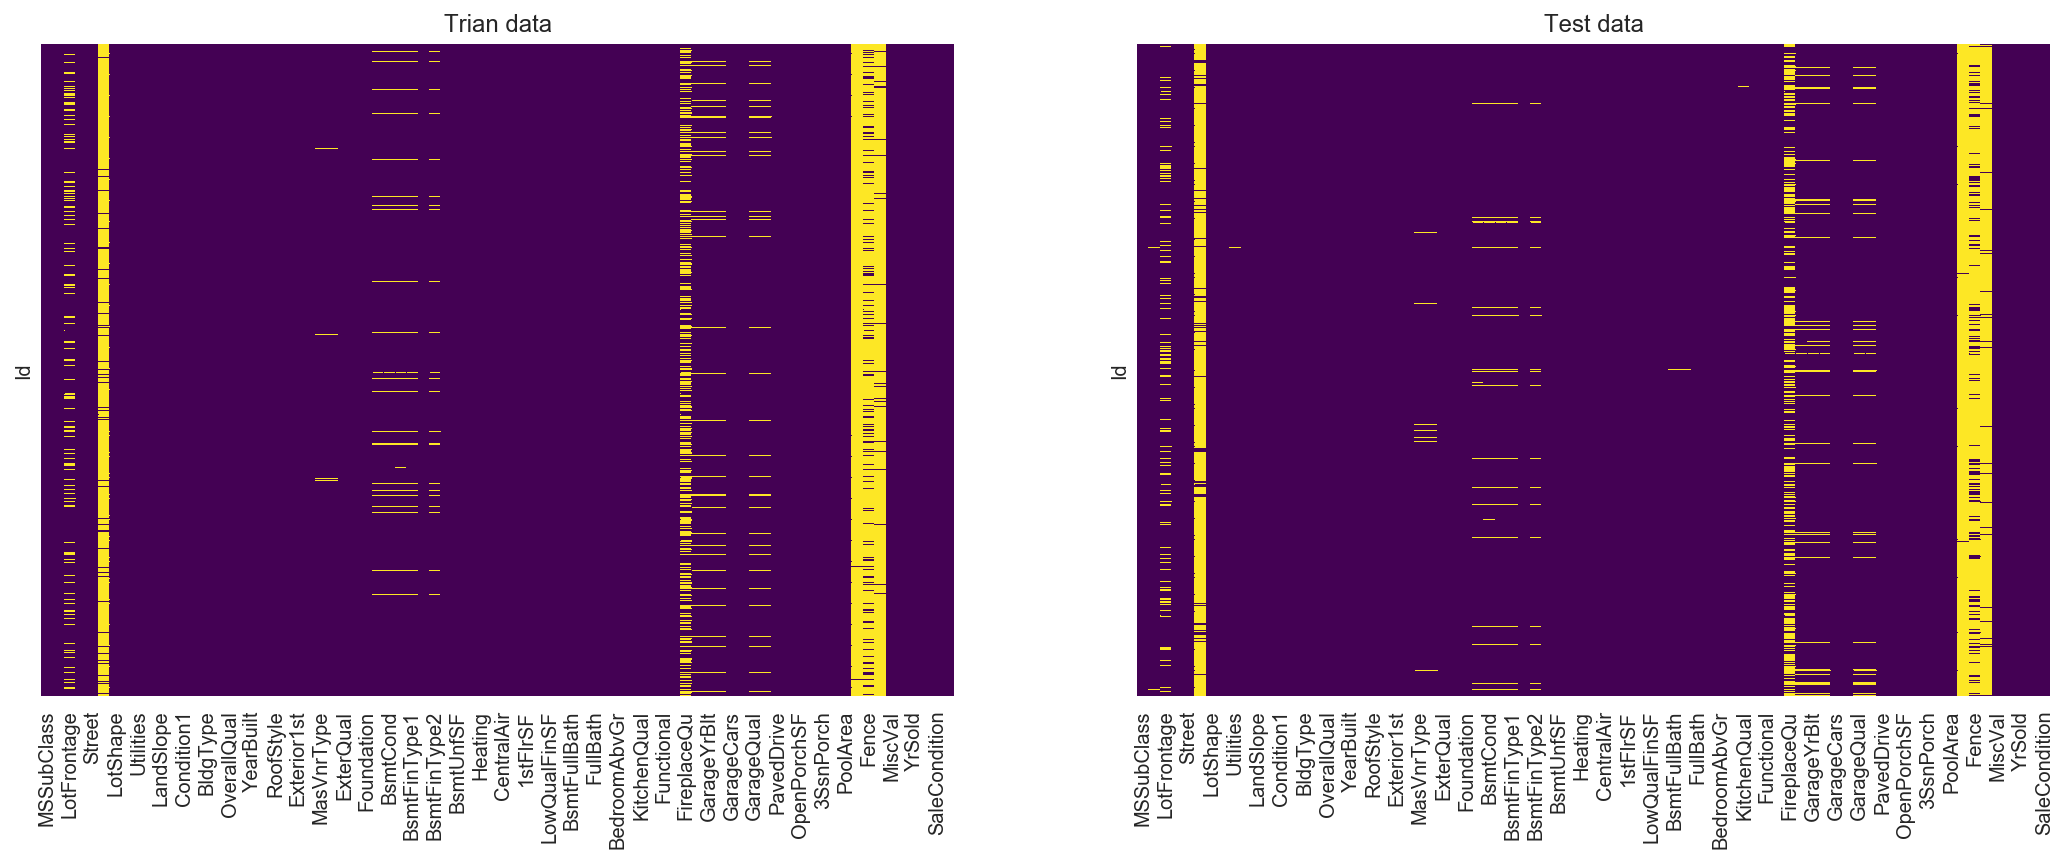

In [25]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.heatmap(train_data.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Trian data')

sns.heatmap(test_data.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

##### Out of 81 features, 19 features have missing values.

In [26]:
missing = df_all.isnull().sum().sort_values(ascending=False)
percentage=(df_all.isnull().sum()/df_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing,percentage],axis=1,keys=['Missing','%']) 
missing_data[missing_data != 0].dropna()

,Missing,%
PoolQC,2909.0,0.996574
MiscFeature,2814.0,0.964029
Alley,2721.0,0.932169
Fence,2348.0,0.804385
FireplaceQu,1420.0,0.486468
LotFrontage,486.0,0.166495
GarageFinish,159.0,0.054471
GarageQual,159.0,0.054471
GarageYrBlt,159.0,0.054471
GarageCond,159.0,0.054471


### Cleaning Data 

  - ####   Converting NaN Numeric Values with KNNImputer

If you have Sklearn 0.22.2 you can use this code in this cell

In [27]:
# numeric_features = df_all.loc[:, df_all.dtypes != np.object]
# imputer = KNNImputer(n_neighbors=60)
# df_all.loc[:, df_all.dtypes != np.object] = imputer.fit_transform(numeric_features)

If you don't have sklearn 0.22.2 comment the cell above and use this cell

In [28]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df_all.loc[:, df_all.dtypes != np.object] = imp.fit_transform(numeric_features)
df_all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,856.0,854.0,0.0,NaN,3.0,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0.0,PConc,2.0,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710.0,1.0,GasA,Ex,2Story,1.0,Gd,Lvl,Gtl,8450.0,Inside,65.0,Reg,0.0,60.0,RL,196.0,BrkFace,NaN,0.0,2.0,CollgCr,61.0,5.0,7.0,Y,0.0,NaN,CompShg,Gable,Normal,WD,0.0,Pave,8.0,856.0,AllPub,0.0,2003.0,2003.0,2008.0
2,1262.0,0.0,0.0,NaN,3.0,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0.0,TA,TA,MetalSd,MetalSd,NaN,TA,1.0,CBlock,2.0,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262.0,0.0,GasA,Ex,1Story,1.0,TA,Lvl,Gtl,9600.0,FR2,80.0,Reg,0.0,20.0,RL,0.0,None,NaN,0.0,5.0,Veenker,0.0,8.0,6.0,Y,0.0,NaN,CompShg,Gable,Normal,WD,0.0,Pave,6.0,1262.0,AllPub,298.0,1976.0,1976.0,2007.0
3,920.0,866.0,0.0,NaN,3.0,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,NaN,TA,1.0,PConc,2.0,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786.0,1.0,GasA,Ex,2Story,1.0,Gd,Lvl,Gtl,11250.0,Inside,68.0,IR1,0.0,60.0,RL,162.0,BrkFace,NaN,0.0,9.0,CollgCr,42.0,5.0,7.0,Y,0.0,NaN,CompShg,Gable,Normal,WD,0.0,Pave,6.0,920.0,AllPub,0.0,2001.0,2002.0,2008.0
4,961.0,756.0,0.0,NaN,3.0,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272.0,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1.0,BrkTil,1.0,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717.0,0.0,GasA,Gd,2Story,1.0,Gd,Lvl,Gtl,9550.0,Corner,60.0,IR1,0.0,70.0,RL,0.0,None,NaN,0.0,2.0,Crawfor,35.0,5.0,7.0,Y,0.0,NaN,CompShg,Gable,Abnorml,WD,0.0,Pave,7.0,756.0,AllPub,0.0,1915.0,1970.0,2006.0
5,1145.0,1053.0,0.0,NaN,4.0,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,NaN,TA,1.0,PConc,2.0,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198.0,1.0,GasA,Ex,2Story,1.0,Gd,Lvl,Gtl,14260.0,FR2,84.0,IR1,0.0,60.0,RL,350.0,BrkFace,NaN,0.0,12.0,NoRidge,84.0,5.0,8.0,Y,0.0,NaN,CompShg,Gable,Normal,WD,0.0,Pave,9.0,1145.0,AllPub,192.0,2000.0,2000.0,2008.0


- ####   Filling Missing Data

In [29]:
edit_values = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
              'GarageQual','PoolQC','Fence','MiscFeature','MasVnrType', 'GarageCond', 'GarageFinish']

for col in edit_values:
    df_all[col].fillna('NA',inplace=True)

In [30]:
df_all.Exterior1st.fillna(value='VinylSd', inplace=True)

df_all.Exterior2nd.fillna(value='VinylSd', inplace=True)

df_all.KitchenQual.fillna(value='TA', inplace=True)

df_all.SaleType.fillna(value='WD', inplace=True)

df_all.Utilities.fillna(value='AllPub', inplace=True)

df_all.Electrical.fillna(value='SBrkr', inplace=True)

df_all.Functional.fillna(value='Typ', inplace=True)

df_all.MSZoning.fillna(value='RL', inplace=True)

In [31]:
# Missung values 
print('Missing values:' ,df_all.isnull().sum().sum())

Missing values: 0


- ### Change the Data Type

In [32]:
df_all['GarageYrBlt']= df_all['GarageYrBlt'].astype(int)

In [33]:
# num = [x for x in df_all.columns if df_all.dtypes[x] != 'object']
# nd = pd.melt(df_all, value_vars = num)
# n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
# n1 = n1.map(sns.distplot, 'value')
# n1

### Distribution of SalePrice

Let's take a look at the most important variable <b>SalePrice</b> It seems there is a long tail to the right which means high sale prices, which will make the mean to be much higher than the median.<br><br>

1.8828757597682129
0.12133506220520406


<function matplotlib.pyplot.show(*args, **kw)>

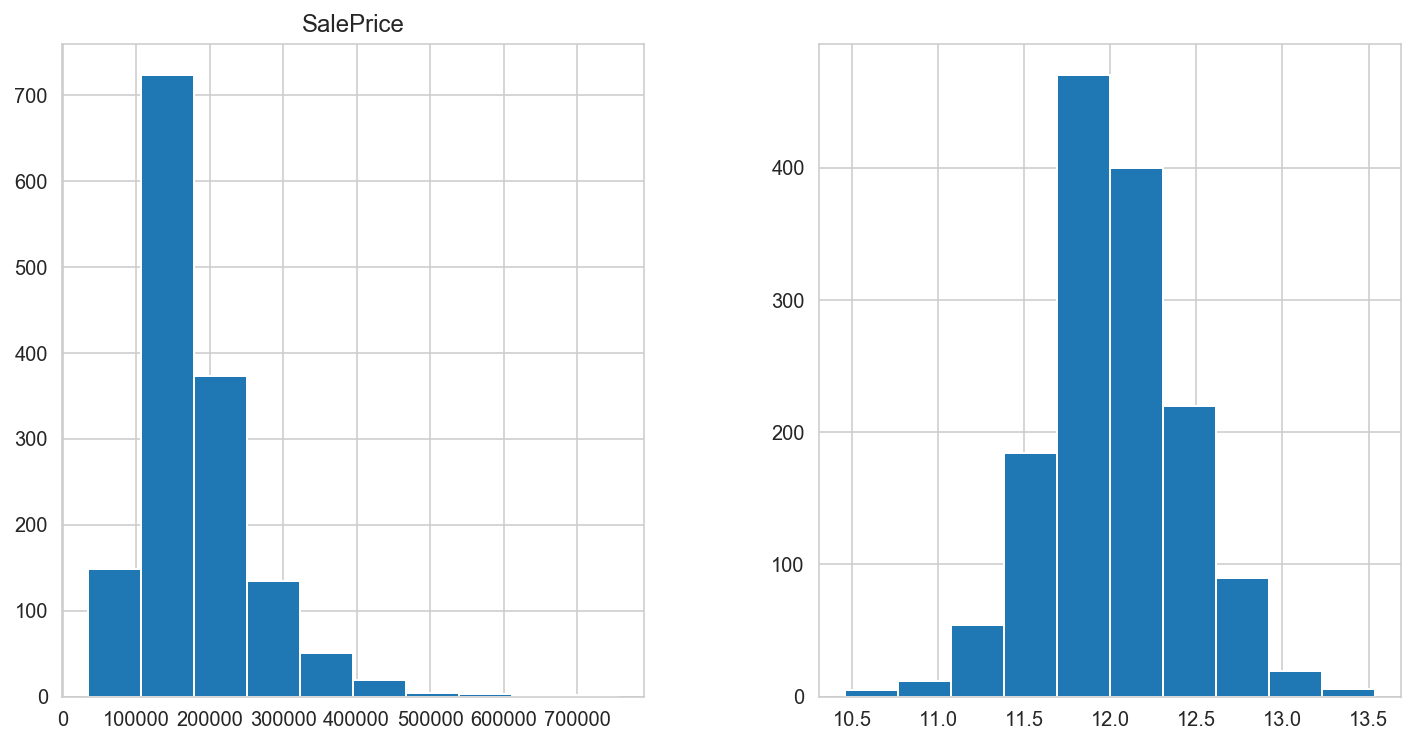

In [34]:
# adding the target to our df
df_all = pd.concat([df_all, train_data['SalePrice']], axis=1)
normal_sp = df_all['SalePrice'].dropna().map(lambda i: np.log(i) if i > 0 else 0)
print(df_all['SalePrice'].skew())
print(normal_sp.skew())

fig, ax = plt.subplots(ncols=2, figsize=(12,6))
df_all.hist('SalePrice', ax=ax[0])
normal_sp.hist(ax=ax[1])
plt.show

- ### SalePrice Correlation Matrix 

Now let's take a look at the most important variables, which will have strong linear releationship with <b>SalePrice</b> variable.<br><br>

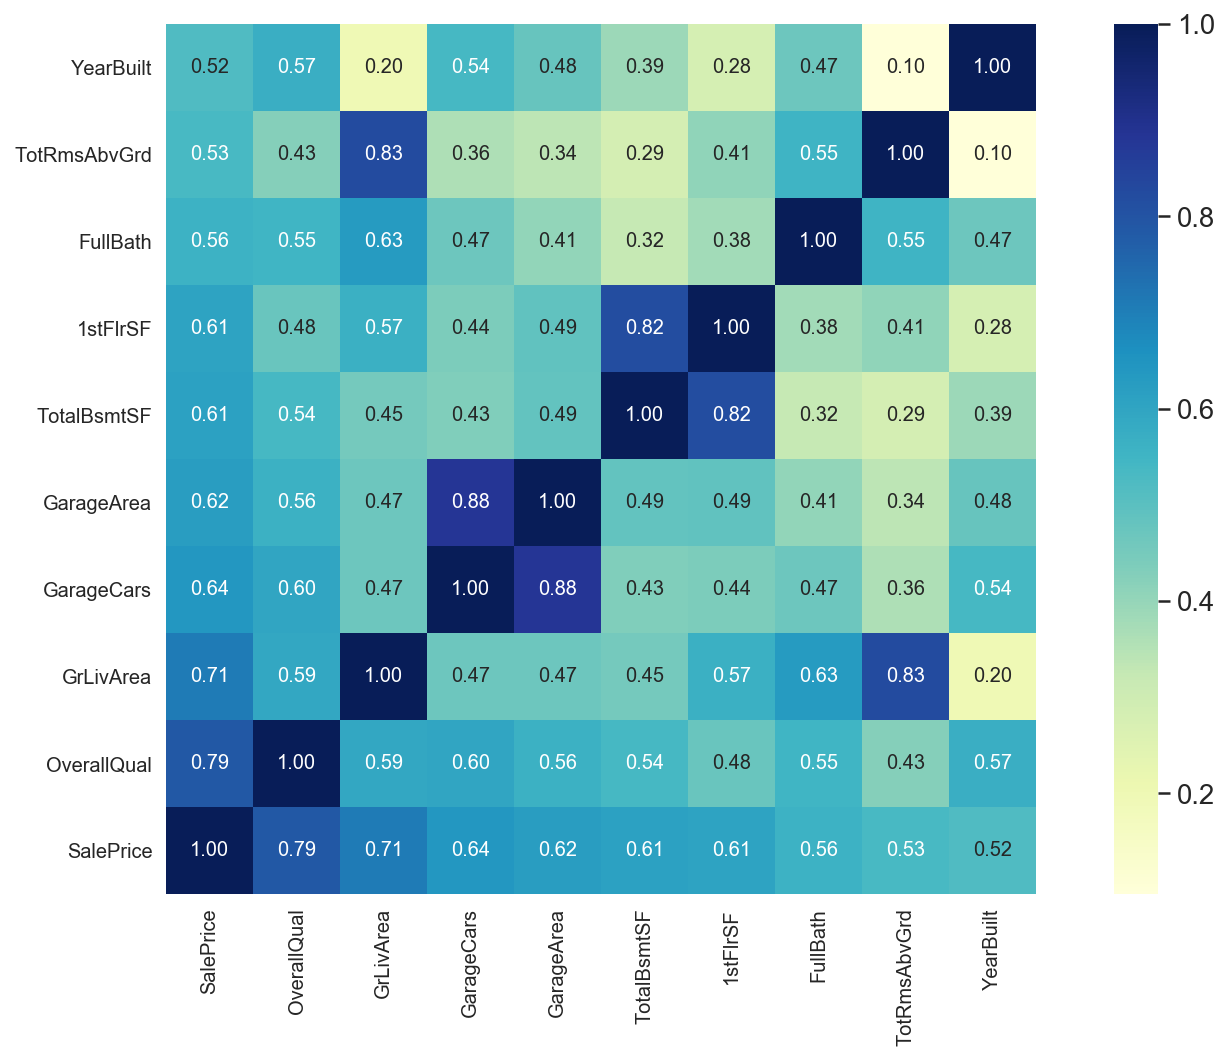

In [35]:
fig, ax = plt.subplots(figsize=(14, 8))
k = 10 #number of variables for heatmap
corrmat = df_all.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_all[cols].dropna().values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values, ax=ax, cmap="YlGnBu")
ax.set_ylim(0 ,10)
plt.show()

In [36]:
# correlation with the target
corr_matrix = df_all.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
GarageYrBlt      0.469056
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334544
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

### Outliars

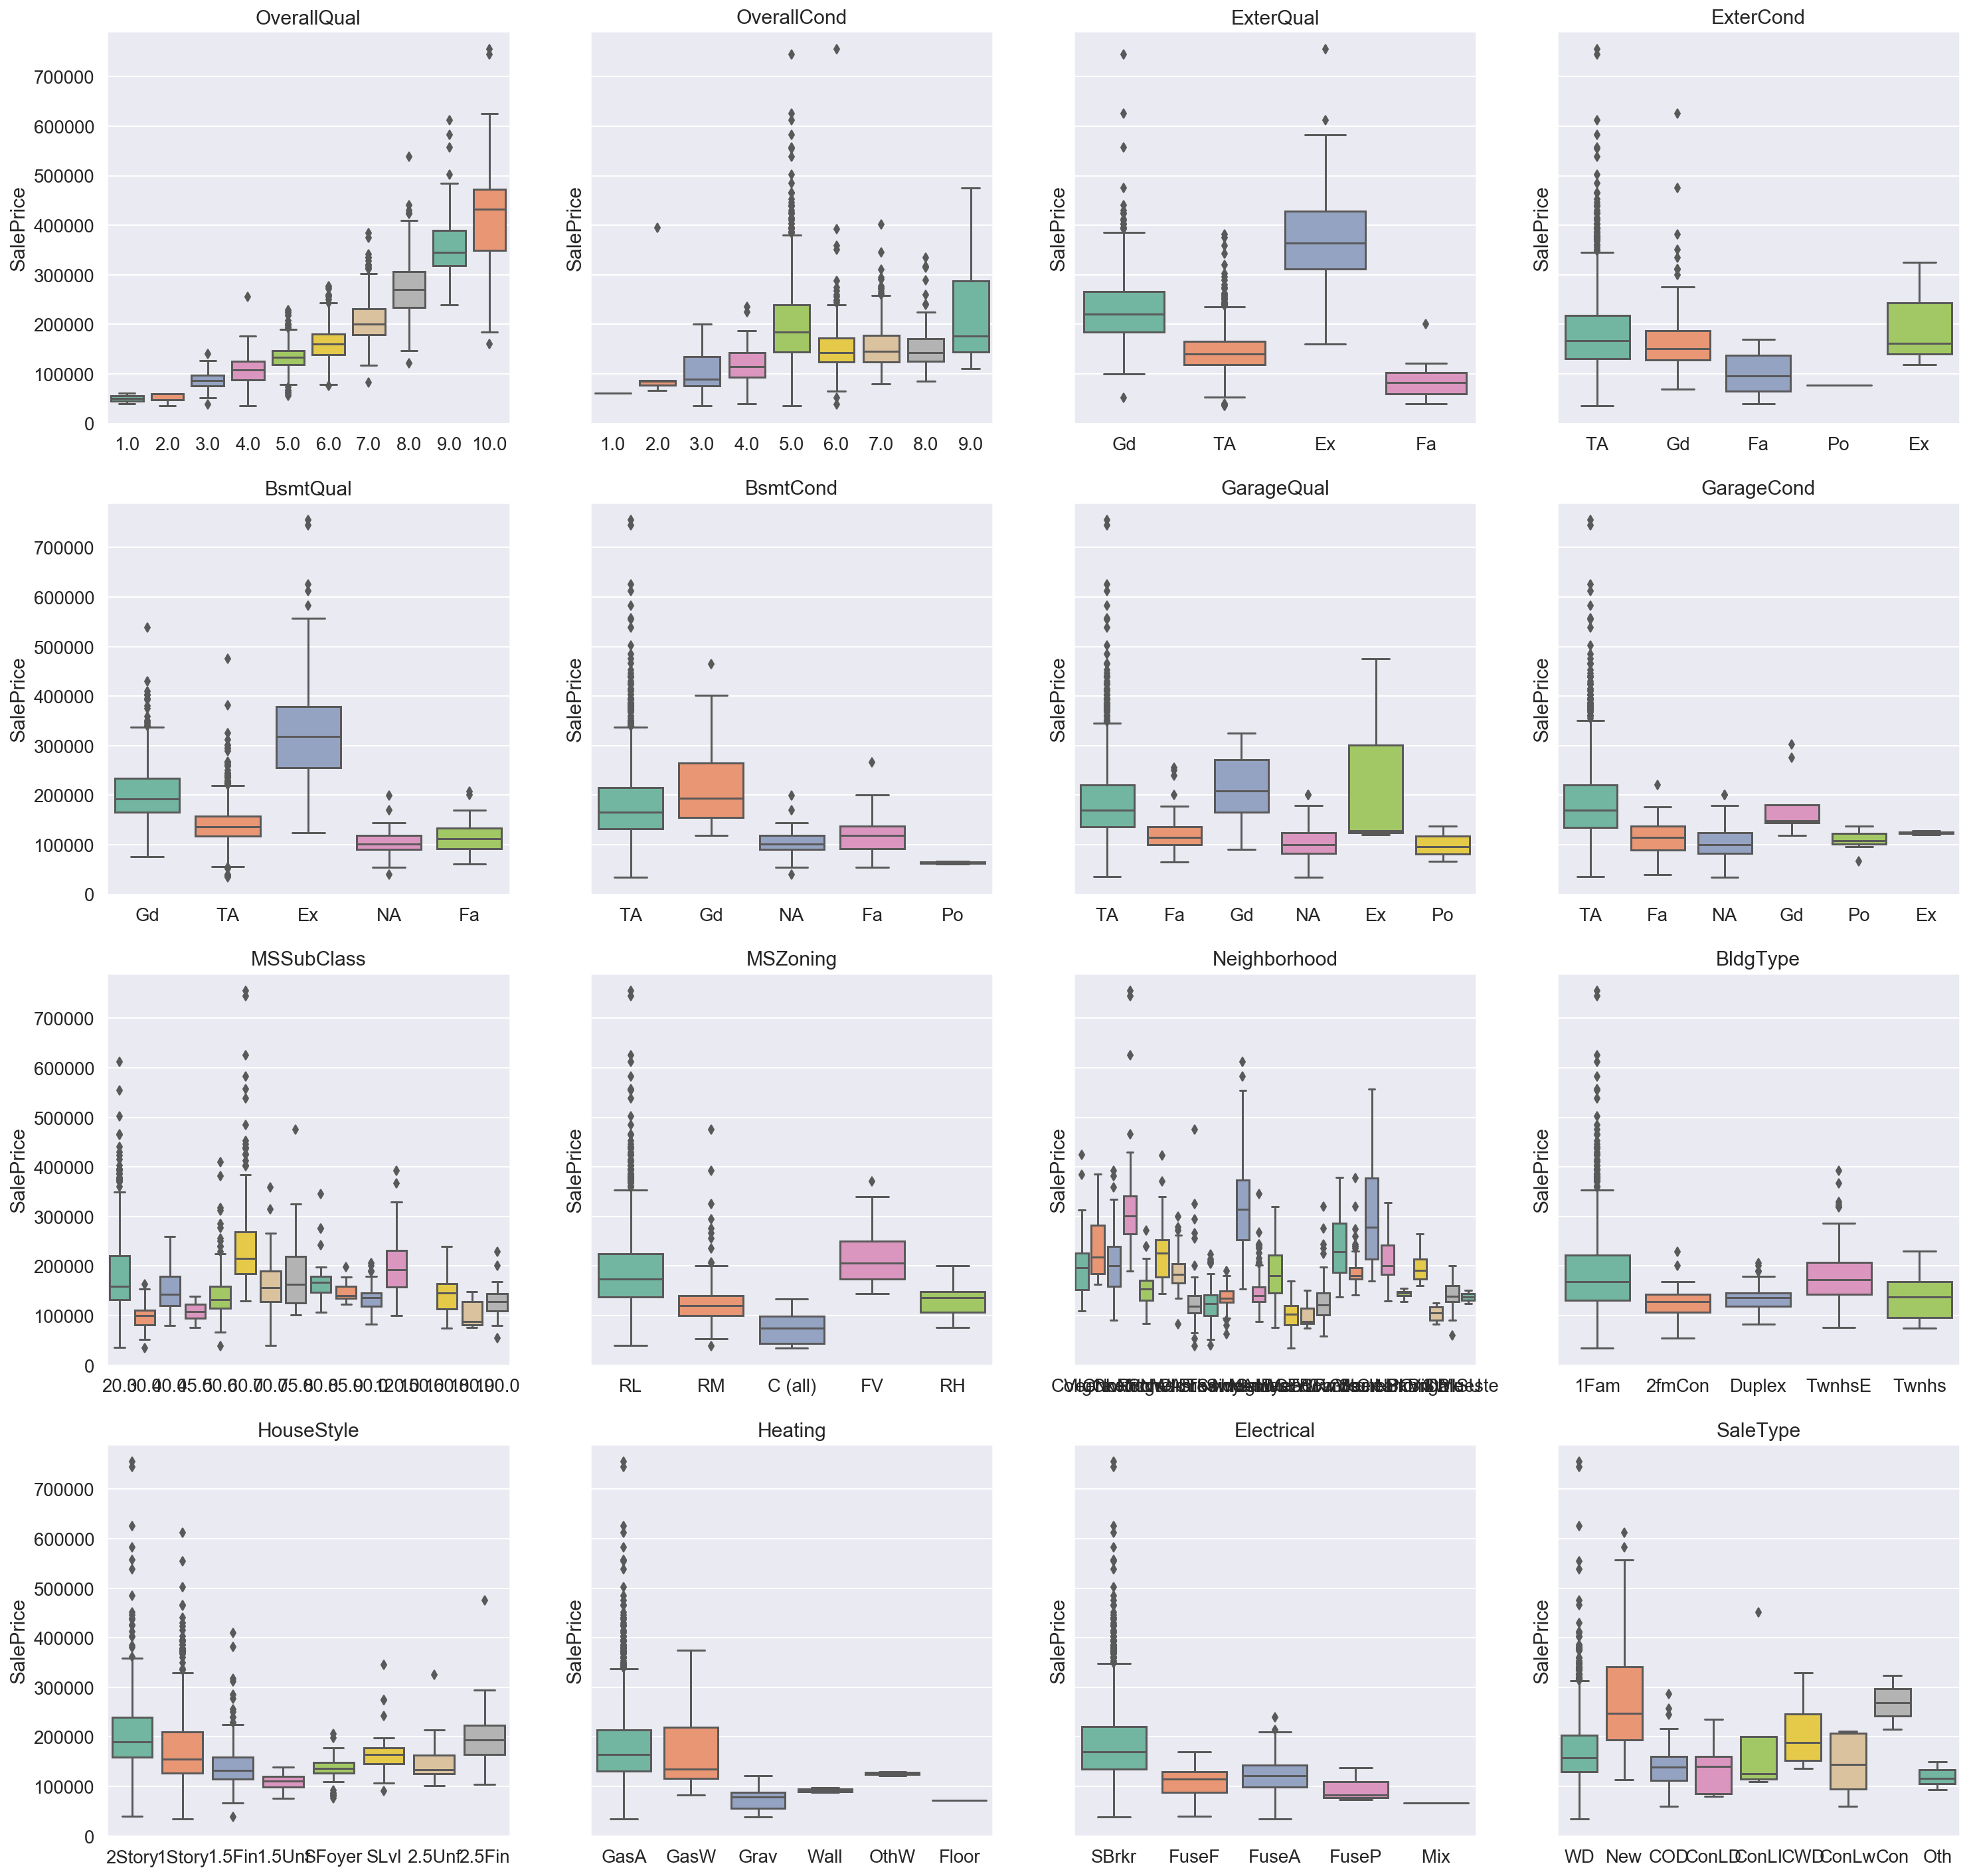

In [37]:
fig, axes = plt.subplots(ncols=4, nrows=4, 
                         figsize=(5 * 5, 5 * 5), sharey=True)
axes = np.ravel(axes)
cols = ['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
        'BsmtCond','GarageQual','GarageCond', 'MSSubClass','MSZoning',
        'Neighborhood','BldgType','HouseStyle','Heating','Electrical','SaleType']
for i, c in zip(np.arange(len(axes)), cols):
    ax = sns.boxplot(x=c, y='SalePrice', data=df_all, ax=axes[i], palette="Set2")
    ax.set_title(c)
    ax.set_xlabel("")

 As we see in the correlation matrix, the features that related to quality and the size affect the sale price, which might affect our results. In addition, OverallQual feature has a significant impact on sale price more than other features.


In [38]:
Q1 = df_all.quantile(0.25)
Q3 = df_all.quantile(0.75)
IQR = Q3 - Q1
outliars = (df_all < (Q1 - 5 * IQR)) | (df_all > (Q3 + 5 * IQR))
#removing bad columns and outliars
no_outliars_df = df_all.drop(['EnclosedPorch', 'KitchenAbvGr'], axis=True)
rm_rows = ['LotArea', 'MasVnrArea', 'PoolArea', 'OpenPorchSF', 'LotFrontage', 'TotalBsmtSF','1stFlrSF',
           'GrLivArea', 'BsmtFinSF1', 'WoodDeckSF']
df_all.drop(['EnclosedPorch', 'KitchenAbvGr'], axis=True, inplace=True)
for row in rm_rows:
    no_outliars_df.drop(no_outliars_df[row][outliars[row]].index, inplace=True)

## Categoriesing features

In [39]:
object_features =df_all.loc[:, df_all.dtypes == np.object]   #object features
df_all= pd.get_dummies(df_all, columns=object_features.columns.values, drop_first=True)
no_outliars_df = pd.get_dummies(no_outliars_df, columns=object_features.columns.values, drop_first=True)


### Separating the Dataset After Cleaning




In [40]:
# Traing Data with Outliers
newtraining=df_all.loc[  : 1460]
# Testing Data with Outliers
newtesting=df_all.loc[1461 : ].drop('SalePrice', axis=1)
# newtraining['SalePrice'] = np.log(newtraining['SalePrice'])
# lab_enc = preprocessing.LabelEncoder()
# newtraining['SalePrice'] = la

In [41]:
# Traing Data without Outliers
no_outliars_training = no_outliars_df.loc[  : 1460]
# Testing Data without Outliers
no_outliars_test = no_outliars_df.loc[1461 : ].drop('SalePrice', axis=1)

### Modeling

- ##### Splitting and Standardizing Train Data to Obtain Test Scores Without Removing the Outliers

In [42]:
y = newtraining['SalePrice']
X = newtraining.drop('SalePrice', axis=1)

In [43]:
ss = StandardScaler()
Xs =ss.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    Xs, y, test_size=30, random_state=1)

- ##### Splitting and Standardizing Train Data to Obtain Test Scores With Removing the Outliers


In [45]:
yo = no_outliars_training['SalePrice']
Xo = no_outliars_training.drop('SalePrice', axis=1)

In [46]:
sso = StandardScaler()
Xso =sso.fit_transform(Xo)

In [47]:
Xo_train, Xo_test, yo_train, yo_test = train_test_split(
    Xso, yo, test_size=30, random_state=1)

   ### 1 - Build Linear Regression Model

  - #### Build the Model With Outliers

In [48]:
lr = LinearRegression()
model= lr.fit(X_train, y_train)
print('Train Score:',model.score(X_train, y_train))
print('Test Score :',model.score(X_test, y_test))

Train Score: 0.9320626612142606
Test Score : -1.2267135047182792e+24


In [49]:
lr_predictions = model.predict(newtesting) 

- #### Build the Model Without Outliers

In [50]:
lro = LinearRegression()
model_o= lro.fit(Xo_train, yo_train)
print('Train Score:', model_o.score(Xo_train, yo_train))
print('Test Score :',model_o.score(Xo_test, yo_test))

Train Score: 0.9408594562321324
Test Score : 0.948269008268612


In [51]:
lro_predictions = model_o.predict(Xso) 

   ### 2 - Build Lasso Model

- #### Build the Model With Outliers

In [52]:
lasso = Lasso(alpha=.0002)
lasso.fit(X_train, y_train)
print('Train Score:',lasso.score(X_train, y_train))
print('Test Score: ', lasso.score(X_test, y_test))

Train Score: 0.9320484348643138
Test Score:  0.9301390184271717


C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 303056473077.6987, tolerance: 892036563.9138724
  positive)


In [53]:
lasso_predictions = lasso.predict(newtesting)

In [54]:
# sqrt(mean_squared_error(submission['SalePrice'],lasso_predictions))

- #### Build the Model Without Outliers

In [55]:
lasso_o = Lasso(alpha=.2)
lasso_o.fit(Xo_train, yo_train)
print('Train Score:',lasso_o.score(Xo_train, yo_train))
print('Test Score:',lasso_o.score(Xo_test, yo_test))

Train Score: 0.9408002517066875
Test Score: 0.9481502476247079


C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218774275800.37387, tolerance: 767195884.1683867
  positive)


 ### 3 - Build LassoCV Model

- #### Build the Model With Outliers

In [56]:
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 1), cv=5,random_state=1)
lasso_cv.fit(X_train, y_train)
print('Train Score :',lasso_cv.score(X_train, y_train))
print('Test Score:',lasso_cv.score(X_test, y_test))

C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228397750225.7532, tolerance: 706182055.3597819
  tol, rng, random, positive)
C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207739316209.083, tolerance: 704990536.7879497
  tol, rng, random, positive)
C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233387583788.9952, tolerance: 717500420.1646276
  tol, rng, random, positive)
C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklear

Train Score : 0.9320484355827343
Test Score: 0.9301460297999954


C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 303066434551.3736, tolerance: 892036563.9138724
  positive)


In [57]:
lasso_cv_predictions = lasso_cv.predict(newtesting) 

- #### Build the Model Without Outliers

In [58]:
lasso_cv_o = LassoCV(cv=10,random_state=1)
lasso_cv_o.fit(Xo_train, yo_train)
print('Train Score:',lasso_cv_o.score(Xo_train, yo_train))
print('Test Score:',lasso_cv_o.score(Xo_test, yo_test))

Train Score: 0.9305434902376121
Test Score: 0.9434964681456641



 ### 4 - Build Ridge Model

- #### Build the Model With Outliers

In [59]:
ridge = Ridge(alpha=1) 
ridge.fit(X_train, y_train)
print('Train Score:',ridge.score(X_train, y_train))
print('Test Score:',ridge.score(X_test, y_test))

Train Score: 0.9318397313549157
Test Score: 0.9073621745233189


In [60]:
ridge_predictions = ridge.predict(newtesting) 

- #### Build the Model Without Outliers


In [61]:
ridge_o = Ridge(alpha=.01) 
ridge_o.fit(Xo_train, yo_train)
print('Train Score:',ridge_o.score(Xo_train, yo_train))
print('Test Score:',ridge_o.score(Xo_test, yo_test))

Train Score: 0.9408593916149544
Test Score: 0.9482678720272659


 ### 5 - Build RidgeCV Model

- #### Build the Model With Outliers

In [62]:
ridgecv = RidgeCV(alphas=np.logspace(-4, 4, 1))
ridgecv.fit(X_train, y_train)
print('Train Score:',ridgecv.score(X_train, y_train))
print('Test Score:',ridgecv.score(X_test, y_test))

Train Score: 0.9320630839883665
Test Score: 0.9044275150479456


In [63]:
ridgeCV_predictions = ridgecv.predict(newtesting) 

- #### Build the Model Without Outliers

In [64]:
ridgecv_o = RidgeCV(alphas=np.logspace(-4, 4, 1)) 
ridgecv_o.fit(Xo_train, yo_train)
print('Train Score:',ridgecv_o.score(Xo_train, yo_train))
print('Test Score:',ridgecv_o.score(Xo_test, yo_test))

Train Score: 0.94085945622559
Test Score: 0.9482689919079459



 ### 6 - Build ElasticNet Model 


- #### Build the Model With Outliers

In [65]:
elastic=ElasticNet(.00001)
elastic = elastic.fit(X_train, y_train)
print('Train Score:',elastic.score(X_train, y_train))
print('Test Score:',elastic.score(X_test, y_test))

Train Score: 0.9320478821391401
Test Score: 0.9298696165545701


C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 303155305709.2235, tolerance: 892036563.9138724
  positive)


In [66]:
elastic_predictions = elastic.predict(newtesting) 

- #### Build the Model Without Outliers


In [67]:
elastic_o=ElasticNet(.00001)
elastic_o = elastic_o.fit(Xo_train, yo_train)
print('Train Score:',elastic_o.score(Xo_train, yo_train))
print('Test Score:',elastic_o.score(Xo_test, yo_test))

Train Score: 0.9408020940700507
Test Score: 0.9481390354036123


C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227121042320.69583, tolerance: 767195884.1683867
  positive)



 ### 7 - Build ElasticNetCV Model 

- #### Build the Model Without Outliers

In [68]:
elastic_cv=ElasticNetCV(alphas=np.logspace(-10, 6, 1))
elastic_cv = elastic_cv.fit(X_train, y_train)
print('Train Score:',elastic_cv.score(X_train, y_train))
print('Test score:',elastic_cv.score(X_test, y_test))

C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228408804251.25955, tolerance: 706182055.3597819
  tol, rng, random, positive)
C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207749817560.86218, tolerance: 704990536.7879497
  tol, rng, random, positive)
C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233388336332.02472, tolerance: 717500420.1646276
  tol, rng, random, positive)
C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sk

Train Score: 0.9320484362956709
Test score: 0.9301530371890724


C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 303076397764.159, tolerance: 892036563.9138724
  positive)


- #### Build the Model Without Outliers

In [69]:
elastic_cv_o=ElasticNetCV(alphas=np.logspace(-4, 4, 1))
elastic_cv_o = elastic_cv_o.fit(Xo_train, yo_train)
print('Train Score :',elastic_cv_o.score(Xo_train, yo_train))
print('Test score  :',elastic_cv_o.score(Xo_test, yo_test))

C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173106997134.0508, tolerance: 596994339.0405767
  tol, rng, random, positive)
C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179816684702.72205, tolerance: 647599340.1739682
  tol, rng, random, positive)
C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163623424241.28146, tolerance: 626586276.866142
  tol, rng, random, positive)
C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\skle

Train Score : 0.9407893859942005
Test score  : 0.9481392834566368


C:\Users\Ghida qahtan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227499635183.19284, tolerance: 767195884.1683867
  positive)



 ### 8 - Build Decision Tree Model 

- #### Build the Model With Outliers


In [70]:
tree = DecisionTreeClassifier(max_depth = 28)
tree.fit(X, y)
print('Score : ',tree.score(X, y))

Score :  0.9979452054794521


In [71]:
tree_predictions = tree.predict(newtesting)

In [72]:
# sqrt(mean_squared_error(submission['SalePrice'], tree_predictions))

- #### Build the Model Without Outliers

In [73]:
tree_o = DecisionTreeClassifier(max_depth = 29)
tree_o.fit(Xo, yo)
print('Score : ',tree_o.score(Xo, yo))

Score :  0.9915552427867699



 ### 9 - Build Random Forest Model 

- #### Build the Model With Outliers

In [74]:
randomF = RandomForestRegressor(max_depth=50)
randomF.fit(X, y)
print('Train score :',randomF.score(X, y))

Train score : 0.9797018571813861


In [75]:
from sklearn.model_selection import KFold
cv=KFold(n_splits=5, shuffle=True, random_state=1)

In [76]:
cross_val_score(randomF, X, y, cv=cv)

array([0.8935252 , 0.83578211, 0.85552429, 0.81259824, 0.90333604])

In [77]:
cross_val_score(randomF, X, y, cv=cv).mean()

0.856509563413954

In [78]:
randomF_predictions = randomF.predict(newtesting) 

In [79]:
# sqrt(mean_squared_error(submission_tree['SalePrice'], randomF_predictions))

In [93]:
#main Features importances
sfm = SelectFromModel(randomF, threshold=0.15,prefit=True)

feat_labels = X.columns

for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

OverallQual


GridSearch

In [175]:
param_grid = {
    'n_estimators': [i for i in range(50,1000,10)],
    'max_features': [86],
    'max_depth' :[i for i in range(1,100,1)]
}

In [176]:
rand = RandomForestRegressor(n_jobs=-1)

gs = GridSearchCV(rand, 
                  param_grid, 
                  cv=5)

In [178]:
gs.fit(X, y)

In [173]:
gs.best_params_

{'max_depth': 20, 'max_features': 3, 'n_estimators': 20}

In [174]:
gs.best_score_

0.7915024489498473

- #### Build the Model Without Outliers

In [147]:
randomF = RandomForestRegressor(max_depth = 50)
randomF.fit(Xo, yo)
print('train score : ',randomF.score(Xo, yo))

/Users/Doaa/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score :  0.9792983487065615


 ### 10 - Build KNeighborsRegressor Model 

- #### Build the Model With Outliers

In [84]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)
print('Train score : ',neigh.score(X_train, y_train))
print('Test score  : ',neigh.score(X_test, y_test))

Train score :  0.839838814099684
Test score  :  0.9212658372427794


In [85]:
neigh_predictions = neigh.predict(newtesting)

In [87]:
# sqrt(mean_squared_error(submission_tree['SalePrice'], neigh_predictions))

- #### Build the Model Without Outliers

In [88]:
neigh_o = KNeighborsRegressor(n_neighbors=3)
neigh_o.fit(Xo_train, yo_train)
print('Train score : ',neigh_o.score(Xo_train, yo_train))
print('Test score  : ',neigh_o.score(Xo_test, yo_test))

Train score :  0.8714458313250343
Test score  :  0.7608406847898654


 ### 11 - Build SVM  Model 


In [179]:
svm_l = svm.SVC(kernel='linear')
svm_l.fit(X, y)
svm_l.score(X, y)

0.9979452054794521

In [180]:
cv=KFold(n_splits=5, shuffle=True, random_state=1)
cross_val_score(svm_l, X, y, cv=cv, n_jobs=-1).mean()

0.00821917808219178

In [191]:
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X, y)
svm_rbf.score(X, y)
cross_val_score(svm_rbf, X, y, cv=5, n_jobs=-1).mean()

/Users/Doaa/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doaa/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.02192505544521009

In [192]:
svm_p = svm.SVC(kernel='poly')
svm_p.fit(X, y)
svm_p.score(X, y)
cross_val_score(svm_p, X, y, cv=5, n_jobs=-1).mean()

/Users/Doaa/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doaa/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.01317341636512585

In [193]:
svm_rbf = svm.SVC(kernel='rbf', gamma=0.001)
cross_val_score(svm_rbf, X, y, cv=5).mean()

/Users/Doaa/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.02192505544521009

###  Results


- #### Creating a list to Store Score Values for Each Model
     -  This list will display the train and test scores without outliers

In [187]:
list_of_Scores = list()

In [188]:
# LinearRegression
results = {'Model':'LinearRegression',
           'Train Score': model.score(X_train, y_train),
           'Test Score':model.score(X_test, y_test),
           'Kaggle Score':None}
list_of_Scores.append(results)
# Lasso
results = {'Model':'Lasso',
           'Train Score':lasso.score(X_train, y_train),
           'Test Score': lasso.score(X_test, y_test),
           'Kaggle Score':0.59683}
list_of_Scores.append(results)
# LassoCV
results = {'Model':'LassoCV',
           'Train Score': lasso_cv.score(X_train, y_train),
           'Test Score':lasso_cv.score(X_test, y_test),
           'Kaggle Score':None}
list_of_Scores.append(results)

# Ridg
results = {'Model':'Ridg',
           'Train Score': ridge.score(X_train, y_train),
           'Test Score':ridge.score(X_test, y_test),
           'Kaggle Score':0.36706}
list_of_Scores.append(results)

# RidgCV
results = {'Model':'RidgCV',
           'Train Score': ridgecv.score(X_train, y_train),
           'Test Score':ridgecv.score(X_test, y_test),
           'Kaggle Score':None}
list_of_Scores.append(results)

# ElasticNet
results = {'Model':'ElasticNet',
           'Train Score': elastic.score(X_train, y_train),
           'Test Score':elastic.score(X_test, y_test),
           'Kaggle Score':6.63994}
list_of_Scores.append(results)

# ElasticNetCV
results = {'Model':'ElasticNetCV',
           'Train Score':elastic_cv.score(X_train, y_train),
           'Test Score':elastic_cv.score(X_test, y_test),
           'Kaggle Score':None}
list_of_Scores.append(results)

# DecisionTreeRegressor
results = {'Model':'DecisionTreeRegressor',
           'Train Score':tree.score(X, y),
           'Test Score':None,
           'Kaggle Score':0.25525}
list_of_Scores.append(results)

# RandomForest
results = {'Model':'RandomForest',
           'Train Score':randomF.score(X, y),
           'Test Score':None,
           'Kaggle Score':0.14824}
list_of_Scores.append(results) 

# KNeighborsRegressor
results = {'Model':'KNeighborsRegressor',
           'Train Score': neigh.score(X_train, y_train),
           'Test Score':neigh.score(X_test, y_test),
           'Kaggle Score':None}
list_of_Scores.append(results)


# SVM
results = {'Model':'SVM',
           'Train Score': svm_l.score(X, y),
           'Test Score':None,
           'Kaggle Score':None}
list_of_Scores.append(results)

In [189]:
df_results = pd.DataFrame(list_of_Scores)

- #### This table provides all the scores that we got from each model.


In [190]:
df_results

,Model,Train Score,Test Score,Kaggle Score
0,LinearRegression,0.932063,-1.226714e+24,NaN
1,Lasso,0.932048,9.301390e-01,0.59683
2,LassoCV,0.932048,9.301460e-01,NaN
3,Ridg,0.931840,9.073622e-01,0.36706
4,RidgCV,0.932063,9.044275e-01,NaN
5,ElasticNet,0.932048,9.298696e-01,6.63994
6,ElasticNetCV,0.932048,9.301530e-01,NaN
7,DecisionTreeRegressor,0.989041,NaN,0.25525
8,RandomForest,0.977181,NaN,0.14824
9,KNeighborsRegressor,0.839839,9.212658e-01,NaN


- #### Creating a list to Store Score Values for Each Model
     -  This list will display the train and test scores without outliers


In [148]:
list_of_Scores_o = list()

In [149]:
# LinearRegression
results_o = {'Model':'LinearRegression',
           'Train Score': lro.score(Xo_train, yo_train),
           'Test Score':lro.score(Xo_test, yo_test)}
list_of_Scores_o.append(results_o)


# Lasso
results_o = {'Model':'Lasso',
           'Train Score': lasso_o.score(Xo_train, yo_train),
           'Test Score':lasso_o.score(Xo_test, yo_test)}
list_of_Scores_o.append(results_o)

# LassoCv
results_o = {'Model':'LassoCv',
           'Train Score': lasso_cv_o.score(Xo_train, yo_train),
           'Test Score':lasso_cv_o.score(Xo_test, yo_test)}
list_of_Scores_o.append(results_o)

# Ridg
results_o = {'Model':'Ridg',
           'Train Score':ridge_o.score(Xo_train, yo_train),
           'Test Score':ridge_o.score(Xo_test, yo_test)}
list_of_Scores_o.append(results_o)

# RidgCV
results_o = {'Model':'RidgCV',
           'Train Score':ridgecv_o.score(Xo_train, yo_train),
           'Test Score':ridgecv_o.score(Xo_test, yo_test)}
list_of_Scores_o.append(results_o)

# ElasticNet
results_o = {'Model':'ElasticNet',
           'Train Score':elastic_o.score(Xo_train, yo_train),
           'Test Score':elastic_o.score(Xo_test, yo_test)}
list_of_Scores_o.append(results_o)

# ElasticNetCV
results_o = {'Model':'ElasticNetCV',
           'Train Score':elastic_cv_o.score(Xo_train, yo_train),
           'Test Score':elastic_cv_o.score(Xo_test, yo_test)}
list_of_Scores_o.append(results_o)

# DecisionTreeRegressor
results_o = {'Model':'DecisionTreeRegressor',
           'Train Score':tree_o.score(Xo, yo),
           'Test Score':None}
list_of_Scores_o.append(results_o)

# RandomForest
results_o = {'Model':'RandomForest',
           'Train Score':randomF_o.score(Xo, yo),
           'Test Score':None}
list_of_Scores_o.append(results_o)

# KNeighborsRegressor
results_o = {'Model':'KNeighborsRegressor',
           'Train Score':neigh_o.score(Xo_train, yo_train),
           'Test Score':neigh_o.score(Xo_test, yo_test)}
list_of_Scores_o.append(results_o)

In [150]:
df_results_o = pd.DataFrame(list_of_Scores_o)

* #### This table provides all the scores that we got from each model.


In [151]:
df_results_o

,Model,Train Score,Test Score
0,LinearRegression,0.940859,0.948269
1,Lasso,0.940800,0.948150
2,LassoCv,0.930543,0.943496
3,Ridg,0.940859,0.948268
4,RidgCV,0.940859,0.948269
5,ElasticNet,0.940802,0.948139
6,ElasticNetCV,0.940789,0.948139
7,DecisionTreeRegressor,0.996481,NaN
8,RandomForest,-16.758986,NaN
9,KNeighborsRegressor,0.871446,0.760841


### Submission  RandomForest

In [ ]:
submission_randomF = submission.copy()
submission_randomF['SalePrice'] = randomF_predictions
submission_randomF['SalePrice'].head()

In [ ]:
# submission_randomF.to_csv('sample_submissionRandom.csv')

# Evaluate Models

- ### Consider your evaluation metrics score
Our evaluation metrics scores are data cleaning and cross-validation

- ### Kaggle Score

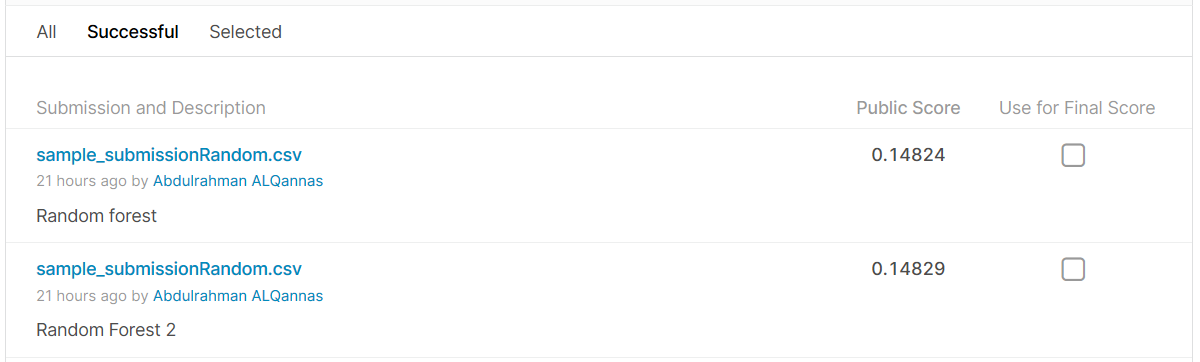

<h4>1- how can your model be used for inference?</h4>
    According to the random forest important featrues, we inference those featrues can play a major part in prediction. the most important featrues are: OverallQual and they gave us a good predect of salePrice feature.

<h4>2- why do you believe your model will generalize to new data?</h4>
According to the random forest important featrues, we inference those featrues can play a major part in prediction. As we got these result:

        train score :  0.9821625329876957
        test score :  0.9821625329876957
And when we  tested the Corss Validation of it, the results were:

        "[0.85885306, 0.80347532, 0.81402519, 0.77931117, 0.87881093]"
With an average of: "0.8508149158677224" ~ 0.85 , this is a good ratio, as it means that the model can generalize any new data that can enter the model at 85 percent of accuracy, as this result indicates that the model is right fitt because a low  viariance of it .